### Use JSON file that contains x/y coordinate points of the annotations for each comet to create polygon masks of comet pixels. These are the analysed and compared for the manual annotation JSON and watershed (ws)/DBSCAN created annotations.

In [13]:
import numpy as np
from skimage.measure import points_in_poly
import json
from pprint import pprint
from skimage.measure import points_in_poly
import matplotlib.pyplot as plt
#
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
#ws_file_expanded = "watershed_comets_rExpanded.json"
ws_file_noExp = "ws_noExp_comets61.json"
watershed_file_Rx = "ws_rx10_comets61.json"
manual_file = "manual_comets61.json"
ws_file_Exp_Rx = "ws_exp10_rx10_comets61"

#manual_file = "MANUAL.json"

#
with open(watershed_file_noExp, 'r') as infile:
    watershed_json_noExp = json.load(infile)
    
with open(ws_file_Rx, 'r') as infile:
    ws_json_Rx = json.load(infile)
    
with open(manual_file, 'r') as infile:
    manual_json = json.load(infile)
    
with open(ws_file_Exp_Rx, 'r') as infile:
    ws_json_Exp_Rx = json.load(infile)
#
def get_masks(json_file, watershed=False):
    """
    This function takes a json file and produces masks from the x/y points defined within it.
    Each mask is of dimensions (nRows, nCols), found from using the 'filename' key to read in 
    the filename and find it's dimensions
    It returns the masks in a single array of dimensions (nRows, nCols, nRegions), where nRegions 
    is the number of x/y coords sets.
    """
    for i in json_file.keys():
        print("i is: ", i)
        dict_name = i
        for j in json_file[i].keys():
            print("j is: ", j)
    nRegions = len(json_file[dict_name]['regions'])
    nImages = len(json_file)
    print("length of dictionary is: ", len(json_file))

    print("dict_name is: ", dict_name)
    print("fileName is: ", json_file[dict_name]['filename'])
    imFile = json_file[dict_name]['filename']
    #imPath = imFile = "../CometImages/exp-val/comets62.bmp"
    imPath = "../CometImages/exp-val/comets62.bmp"
    
    imgRaw = plt.imread(imPath)
    #print("image shape is: ", imgRaw.shape)
    nRows, nCols = imgRaw.shape[0], imgRaw.shape[1]

    #           
    mask = np.zeros((nRows, nCols, nRegions))
    #
    rows = np.linspace(0, nRows, nRows)
    cols = np.linspace(0, nCols, nCols)
    cMesh, rMesh = np.meshgrid(cols, rows)
    #
    cFlat = cMesh.flatten()
    rFlat = rMesh.flatten()
    nPix = len(cFlat)
    imgPixels = np.zeros((nPix, 2))
    imgPixels[:, 0] = cFlat
    imgPixels[:, 1] = rFlat
    comPix = 0
    bkgPix = 0
    #           
    watershed_masks = np.zeros((nRows, nCols, nRegions))
    for n in range(0, nRegions):
        if watershed == True:
            x_points = json_file[dict_name]['regions'][str(n)]['shape_attributes']['all_points_x']
            y_points = json_file[dict_name]['regions'][str(n)]['shape_attributes']['all_points_y']
        else:
            x_points = json_file[dict_name]['regions'][n]['shape_attributes']['all_points_x']
            y_points = json_file[dict_name]['regions'][n]['shape_attributes']['all_points_y']
        
        points = len(x_points)
        #print("number of x and y points are: ", points)
        polygon = np.zeros((points, 2))
        #print("shape of polygon is: ", polygon.shape)
        polygon[:, 0] = x_points
        polygon[:, 1] = y_points
        thisMask = points_in_poly(imgPixels, polygon[:,:])
        #print("shape of thisMask: ", thisMask.shape)
        thisMask = np.reshape(thisMask, (nRows, nCols))
        #print("shape of thisMask after reshape is: ", thisMask.shape)
        mask[:, :, n] = thisMask
    
    return(mask, nRegions)

wMasks, nRegionsW = get_masks(watershed_json, watershed=True)
mMasks, nRegionsM = get_masks(manual_json, watershed=False)
wMasksRx, nRegionsWRx = get_masks(ws_expanded_json, watershed = True)
wMasksNoExp, nRegionsNoExp = get_masks(ws_noExp_json, watershed = True)
print("number of regions in wMasks and mMasks is the same: ", nRegionsW == nRegionsM)
print("number of regions in wMasks, mMasks and wMasksRx is the same: ", nRegionsW == nRegionsM == nRegionsWRx)

#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))   

Date and time  2021-12-15 15:25:44.348148
i is:  comets62.bmp1448758
j is:  base64_img_data
j is:  file_attributes
j is:  filename
j is:  fileref
j is:  regions
j is:  size
length of dictionary is:  1
dict_name is:  comets62.bmp1448758
fileName is:  ../CometImages/exp-val/comets62.bmp
i is:  comets62.bmp1448758
j is:  file_attributes
j is:  regions
j is:  filename
j is:  size
length of dictionary is:  1
dict_name is:  comets62.bmp1448758
fileName is:  comets62.bmp
i is:  comets62.bmp1448758
j is:  base64_img_data
j is:  file_attributes
j is:  filename
j is:  size
j is:  regions
j is:  fileref
length of dictionary is:  1
dict_name is:  comets62.bmp1448758
fileName is:  ../CometImages/exp-val/comets62.bmp
i is:  comets62.bmp1448758
j is:  base64_img_data
j is:  file_attributes
j is:  filename
j is:  size
j is:  regions
j is:  fileref
length of dictionary is:  1
dict_name is:  comets62.bmp1448758
fileName is:  ../CometImages/exp-val/comets62.bmp
number of regions in wMasks and mMasks is t

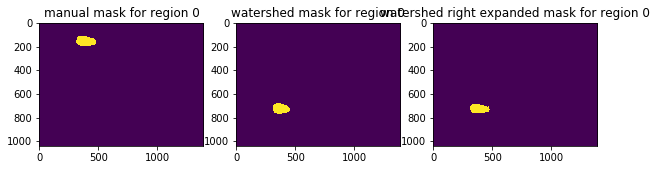

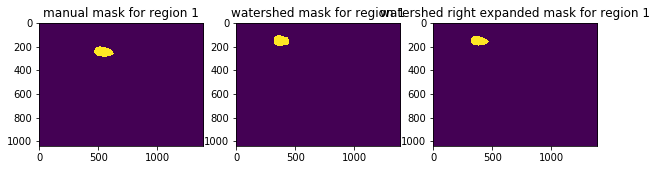

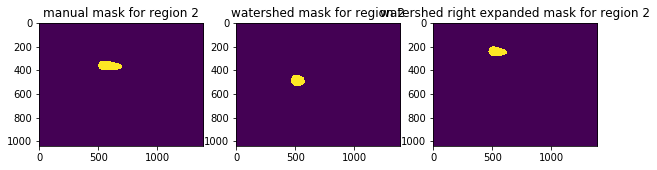

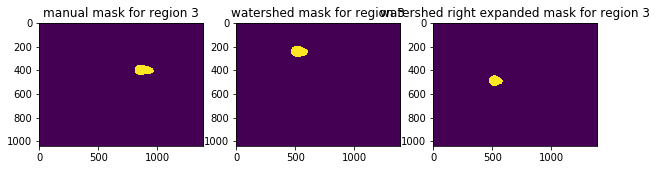

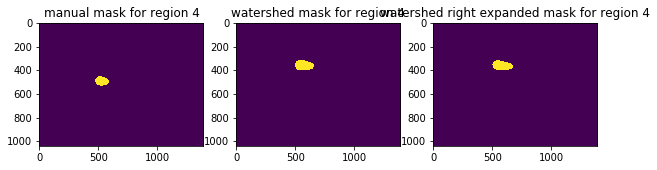

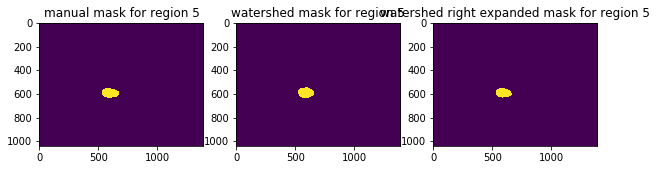

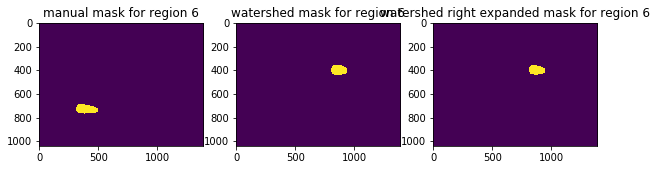


watershed mask  0 average point is:  [376. 723.]
watershed maskRx  0 average point is:  [388. 724.]

watershed mask  1 average point is:  [380. 149.]
watershed maskRx  1 average point is:  [387. 150.]

watershed mask  2 average point is:  [520. 486.]
watershed maskRx  2 average point is:  [540. 241.]

watershed mask  3 average point is:  [530. 240.]
watershed maskRx  3 average point is:  [524. 488.]

watershed mask  4 average point is:  [571. 358.]
watershed maskRx  4 average point is:  [582. 359.]

watershed mask  5 average point is:  [589. 588.]
watershed maskRx  5 average point is:  [593. 590.]

watershed mask  6 average point is:  [867. 395.]
watershed maskRx  6 average point is:  [873. 396.]


In [8]:
for n in range(0, nRegionsM):
    fig = plt.figure(figsize=(10,12))
    fig.add_subplot(1, 3, 1)
    plt.title("manual mask for region " + str(n))
    plt.imshow(mMasks[:,:,n])
    fig.add_subplot(1, 3, 2)
    plt.title("watershed mask for region " + str(n))
    plt.imshow(wMasks[:,:,n])
    fig.add_subplot(1, 3, 3)
    plt.title("watershed right expanded mask for region " + str(n))
    plt.imshow(wMasksRx[:,:,n])
    plt.show()
    
wMaskAvgs = np.zeros((nRegionsM, 2))
wMaskAvgsRx = np.zeros((nRegionsM, 2))
for n in range(0, nRegionsM):
    yMask, xMask = np.where(wMasks[:, :, n] == 1)
    yMaskRx, xMaskRx = np.where(wMasksRx[:, :, n] == 1)
    xAvg = np.average(xMask).astype(int)
    yAvg = np.average(yMask).astype(int)
    xAvgRx = np.average(xMaskRx).astype(int)
    yAvgRx = np.average(yMaskRx).astype(int)
    wMaskAvgs[n, 0] = xAvg
    wMaskAvgs[n, 1] = yAvg
    wMaskAvgsRx[n, 0] = xAvgRx
    wMaskAvgsRx[n, 1] = yAvgRx
    print("\nwatershed mask ", n, "average point is: ", wMaskAvgs[n,:])
    print("watershed maskRx ", n, "average point is: ", wMaskAvgsRx[n,:])
#print("wMaskAvgs is: ", wMaskAvgs)



### Need to reorder one of the mask arrays to match up to the regions of the other.
### Chosen to use the order of watershed and rearrange the manual to match it
### Using the average mask pixel from the watershed masks and check if they're in the old manual region at that same index. If not, continue to next manual mask. If it is, save that mask to the same position as in the watershed masks in teh new manual masks array.

7
avg Pixels (Y, X) are:  723 376
avg pix IS NOT oldMmasks index  0
avg pix IS NOT oldMmasks index  1
avg pix IS NOT oldMmasks index  2
avg pix IS NOT oldMmasks index  3
avg pix IS NOT oldMmasks index  4
avg pix IS NOT oldMmasks index  5
avg pix IS IN oldMmasks index  6
avg Pixels (Y, X) are:  149 380
avg pix IS IN oldMmasks index  0
avg Pixels (Y, X) are:  486 520
avg pix IS NOT oldMmasks index  0
avg pix IS NOT oldMmasks index  1
avg pix IS NOT oldMmasks index  2
avg pix IS NOT oldMmasks index  3
avg pix IS IN oldMmasks index  4
avg Pixels (Y, X) are:  240 530
avg pix IS NOT oldMmasks index  0
avg pix IS IN oldMmasks index  1
avg Pixels (Y, X) are:  358 571
avg pix IS NOT oldMmasks index  0
avg pix IS NOT oldMmasks index  1
avg pix IS IN oldMmasks index  2
avg Pixels (Y, X) are:  588 589
avg pix IS NOT oldMmasks index  0
avg pix IS NOT oldMmasks index  1
avg pix IS NOT oldMmasks index  2
avg pix IS NOT oldMmasks index  3
avg pix IS NOT oldMmasks index  4
avg pix IS IN oldMmasks index

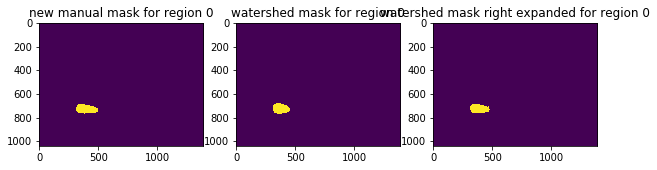

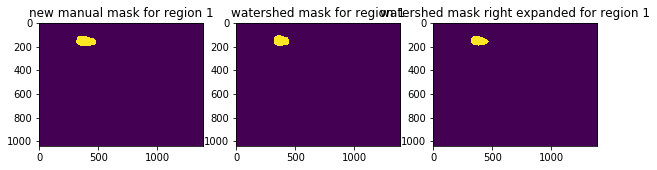

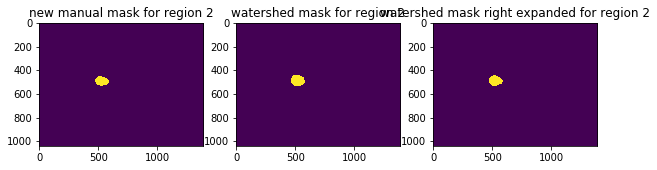

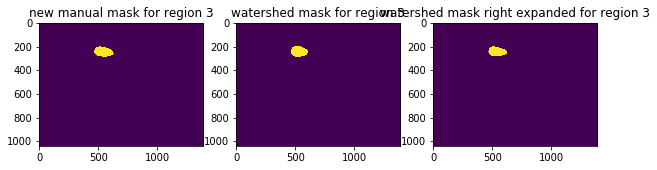

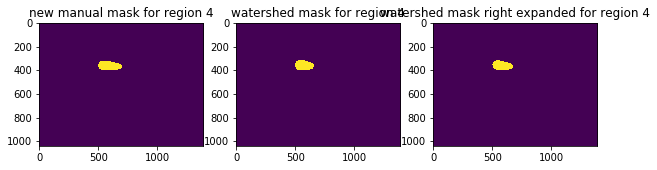

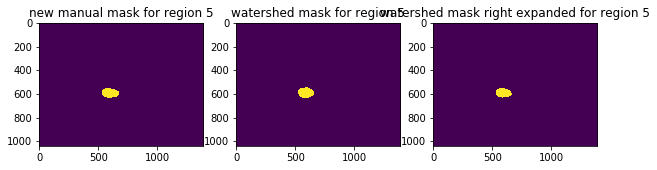

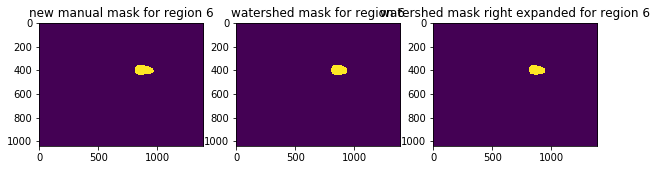

In [9]:
## Create new manual array to match up regions in equivalent indices of mask arrays for watershed masks and manual masks

oldMmasks = mMasks #define the current manual masks array as the old one
nRows, nCols = oldMmasks.shape[0], oldMmasks.shape[1]
newMmasks = np.zeros((nRows, nCols, nRegionsM))  #create a new manual masks array

oldWmasksRx = wMasksRx
newWmasksRx = np.zeros((nRows, nCols, nRegionsM))

print(nRegionsM)
#loop to reorder manual masks to match watershed masks order
for n in range (0, nRegionsM):
    avgPointX = wMaskAvgs[n, 0].astype(int)
    avgPointY = wMaskAvgs[n, 1].astype(int)  #get the x/y coords of teh avg mask point
    print("avg Pixels (Y, X) are: ", avgPointY, avgPointX)
    for i in range(0, nRegionsM):
        test = oldMmasks[avgPointY, avgPointX, i] # check if the avg pixle in old masks is 1/0 (in or not in)
        if test == 1:
            print("avg pix IS IN oldMmasks index ", i)
            newMmasks[:,:, n] = oldMmasks[:,:,i] #if avg point in mask region, assign to new manual masks at same index as watershed mask (n)
            break  #this region has been found so break this loop and go to next avg point check
        else:
            print("avg pix IS NOT oldMmasks index ", i)
            continue  #if avg point not in manual mask region, move to next oldMmask#

#loop to reorder wsRx masks to match ws (no right expansion) masks
for n in range (0, nRegionsM):
    avgPointX = wMaskAvgs[n, 0].astype(int)
    avgPointY = wMaskAvgs[n, 1].astype(int)  #get the x/y coords of teh avg mask point
    print("avg Pixels (Y, X) are: ", avgPointY, avgPointX)
    for i in range(0, nRegionsM):
        test = oldWmasksRx[avgPointY, avgPointX, i] # check if the avg pixle in old masks is 1/0 (in or not in)
        if test == 1:
            print("avg pix IS IN oldWmasksRx index ", i)
            newWmasksRx[:,:, n] = oldWmasksRx[:,:,i] #if avg point in mask region, assign to new manual masks at same index as watershed mask (n)
            break  #this region has been found so break this loop and go to next avg point check
        else:
            print("avg pix IS NOT oldWmasksRx index ", i)
            continue  #if avg point not in manual mask region, move to next oldMmask

for n in range(0, nRegionsM):
    fig = plt.figure(figsize=(10,12))
    fig.add_subplot(1, 3, 1)
    plt.title("new manual mask for region " + str(n))
    plt.imshow(newMmasks[:,:,n])
    fig.add_subplot(1, 3, 2)
    plt.title("watershed mask for region " + str(n))
    plt.imshow(wMasks[:,:,n])
    fig.add_subplot(1, 3, 3)
    plt.title("watershed mask right expanded for region " + str(n))
    plt.imshow(newWmasksRx[:,:,n])
    plt.show()   

In [10]:
import cv2
import numpy as np
#   
nMasks = wMasks.shape[2]
for n in range(0, nMasks):
    print("\nmask ", n)
    watershedPix = np.sum(wMasks[:,:, n])
    wsPixRx = np.sum(newWmasksRx[:,:, n])
    manualPix = np.sum(newMmasks[:,:, n])
    print("Number of pixels in watershed mask: ", watershedPix)
    print("Number of pixels in watershed right extended mask: ", wsPixRx)
    print("Number of pixels in manual mask: ", manualPix)
    maskAND = cv2.bitwise_and(newMmasks[: , :, n], wMasks[:,:, n])
    #print("maskAND (TRUE POSITIVE) sum is: ", np.sum(maskAND))
    maskXOR = cv2.bitwise_xor(newMmasks[: , :, n], wMasks[:,:, n])
    #print("maskXOR sum is: ", np.sum(maskXOR))
    TP = np.sum(np.logical_and(wMasks[:,:, n], newMmasks[:,:, n]))
    FP = np.sum(np.logical_and(wMasks[:,:, n], np.logical_not(newMmasks[:,:, n])))
    FN = np.sum(np.logical_and(newMmasks[:,:, n], np.logical_not(wMasks[:,:, n])))
    print("TP value is: ", TP)
    print("FP value is: ", FP)
    print("FN value is: ", FN)

    
n = 6
ws = wMasks[:,:, n]
manual = newMmasks[:,:, n]
yWS, xWS = np.where(ws==1)
print("yWS and xWS length are: ", len(yWS), len(xWS) )
lenX = np.max(xWS) - np.min(xWS)
lenY = np.max(yWS) - np.min(yWS)
print("length and height of mask are: ", lenX, lenY)



mask  0
Number of pixels in watershed mask:  10160.0
Number of pixels in watershed right extended mask:  10426.0
Number of pixels in manual mask:  11689.0
TP value is:  9220
FP value is:  940
FN value is:  2469

mask  1
Number of pixels in watershed mask:  9688.0
Number of pixels in watershed right extended mask:  9223.0
Number of pixels in manual mask:  11521.0
TP value is:  9425
FP value is:  263
FN value is:  2096

mask  2
Number of pixels in watershed mask:  8725.0
Number of pixels in watershed right extended mask:  7978.0
Number of pixels in manual mask:  7305.0
TP value is:  6754
FP value is:  1971
FN value is:  551

mask  3
Number of pixels in watershed mask:  10335.0
Number of pixels in watershed right extended mask:  9995.0
Number of pixels in manual mask:  10909.0
TP value is:  9375
FP value is:  960
FN value is:  1534

mask  4
Number of pixels in watershed mask:  11017.0
Number of pixels in watershed right extended mask:  11228.0
Number of pixels in manual mask:  12519.0
TP

### Plotting watershed and manual annotations together to see proportion that isn't found by the watershed method.
### Then plotting masks together to see that effect also

Date and time  2021-12-15 12:32:41.450130
comets62.bmp
i is:  comets62.bmp1448758
j is:  file_attributes
j is:  regions
j is:  filename
j is:  size
length of dictionary (number of images is:  1
dict_name is:  comets62.bmp1448758
fileName is:  comets62.bmp


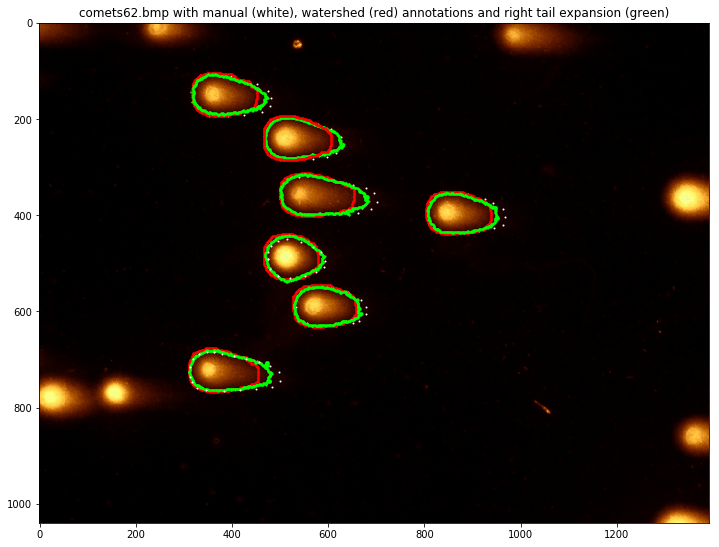

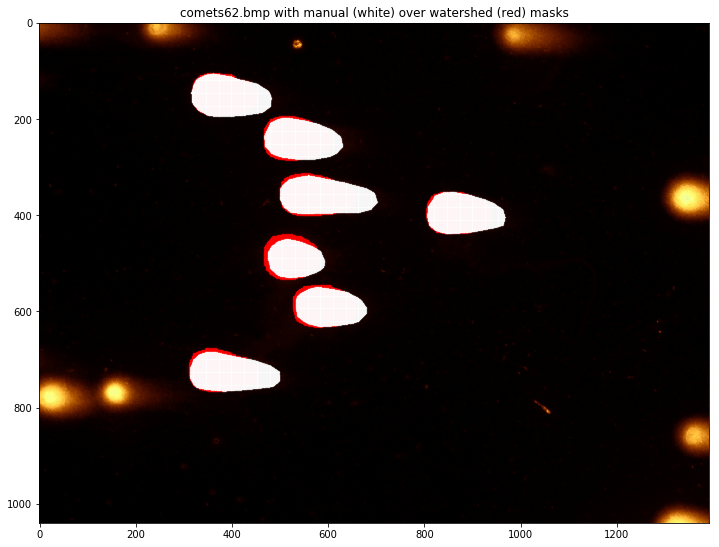

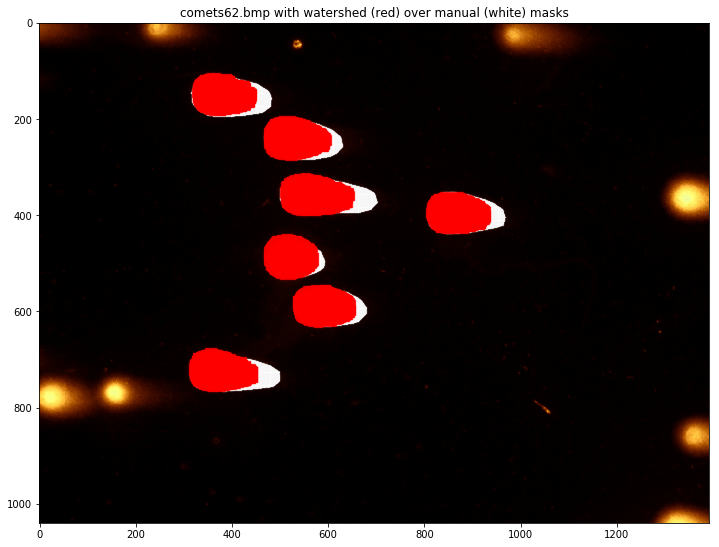

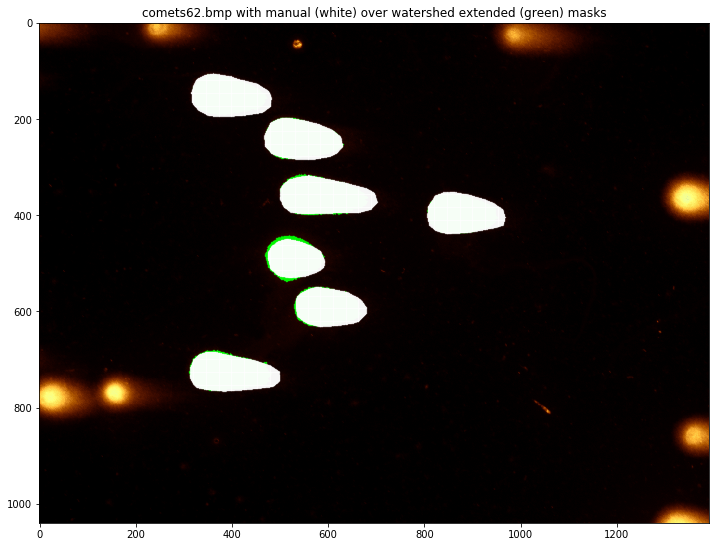

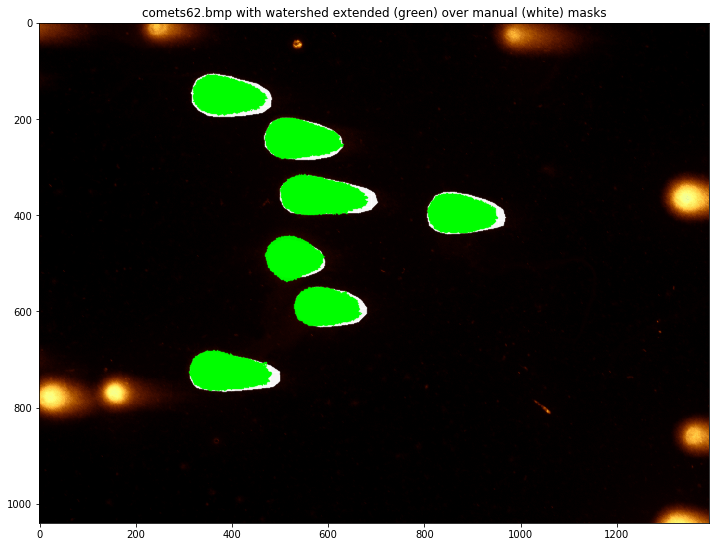

 
Date and time 2021-12-15 12:32:47.695953
Time since last check is 0:00:06.245823


In [11]:
import numpy as np
from skimage.measure import points_in_poly
import json
from pprint import pprint
from skimage.measure import points_in_poly
import matplotlib.pyplot as plt
import glob as glob
import os
#
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
watershed_file = "watershed_comets.json"
manual_file = "manual_comets.json"
#
with open(watershed_file, 'r') as infile:
    watershed_json = json.load(infile)
    
with open(ws_file_expanded, 'r') as infile:
    ws_expanded_json = json.load(infile)
    
with open(manual_file, 'r') as infile:
    manual_json = json.load(infile)

imPath = "../CometImages/exp-val/comets62.bmp"
fileName = [os.path.basename(x) for x in sorted(glob.glob(imPath))][0]  #only file name with extension
print(fileName)
imgRaw = plt.imread(imPath)
#
def plot_polygon_points(json_manual, json_watershed, json_watershedRx):
    """
    This function takes a json file and output the x/y coordinates 
    of the poygons that define the comets within each image.
    """
####
    for i in json_manual.keys():  #json_file = json_manual
        print("i is: ", i)
        dict_name = i
        for j in json_manual[i].keys():
            print("j is: ", j)
    nRegions = len(json_manual[dict_name]['regions'])
    nImages = len(json_manual)
    print("length of dictionary (number of images is: ", len(json_manual))

    print("dict_name is: ", dict_name)
    print("fileName is: ", json_manual[dict_name]['filename'])
    imFile = json_manual[dict_name]['filename']
    #imPath = imFile = "../CometImages/exp-val/comets62.bmp"
    imPath = "../CometImages/exp-val/comets62.bmp"
    
    imgRaw = plt.imread(imPath)
    #print("image shape is: ", imgRaw.shape)
    """
    nRows, nCols = imgRaw.shape[0], imgRaw.shape[1]
    rows = np.linspace(0, nRows, nRows)
    cols = np.linspace(0, nCols, nCols)
    cMesh, rMesh = np.meshgrid(cols, rows)
    #
    cFlat = cMesh.flatten()
    rFlat = rMesh.flatten()
    nPix = len(cFlat)
    imgPixels = np.zeros((nPix, 2))
    imgPixels[:, 0] = cFlat
    imgPixels[:, 1] = rFlat
    #
    """
    fig = plt.figure(figsize = (12, 10))
    plt.title(fileName + " with manual (white), watershed (red) annotations and right tail expansion (green)")
    plt.imshow(imgRaw)
    #    
    
    for n in range(0, nRegions):
        x_points_ws = json_watershed[dict_name]['regions'][str(n)]['shape_attributes']['all_points_x']
        y_points_ws = json_watershed[dict_name]['regions'][str(n)]['shape_attributes']['all_points_y']
        
        x_points_wsRx = json_watershedRx[dict_name]['regions'][str(n)]['shape_attributes']['all_points_x']
        y_points_wsRx = json_watershedRx[dict_name]['regions'][str(n)]['shape_attributes']['all_points_y']

        x_points_man = json_manual[dict_name]['regions'][n]['shape_attributes']['all_points_x']
        y_points_man = json_manual[dict_name]['regions'][n]['shape_attributes']['all_points_y']
        
        plt.scatter(x_points_man, y_points_man, c='w', s=1)
        plt.scatter(x_points_ws, y_points_ws, c='r', s=1)
        plt.scatter(x_points_wsRx, y_points_wsRx, c='lime', s=1)
        #points = len(x_points)
    plt.show()

#
plots = plot_polygon_points(manual_json, watershed_json, ws_expanded_json)
#
if nRegionsW == nRegionsM:
     nMasks = nRegionsW
else:
    print("number of masks does not match!")
fig = plt.figure(figsize = (12,10))
plt.title(fileName + " with manual (white) over watershed (red) masks")
plt.imshow(imgRaw)
  #  
for n in range(nMasks):
    wsPixY, wsPixX = np.where(wMasks[:, :, n] == 1)
    plt.scatter(wsPixX, wsPixY, c='r', s=0.05)
    manPixY, manPixX = np.where(newMmasks[:, :, n] == 1)
    plt.scatter(manPixX, manPixY, c='w', s=0.05)
plt.show()
#
fig = plt.figure(figsize = (12,10))
plt.title(fileName + " with watershed (red) over manual (white) masks")
plt.imshow(imgRaw)
  #  
for n in range(nMasks):
    manPixY, manPixX = np.where(newMmasks[:, :, n] == 1)
    plt.scatter(manPixX, manPixY, c='w', s=0.05)
    wsPixY, wsPixX = np.where(wMasks[:, :, n] == 1)
    plt.scatter(wsPixX, wsPixY, c='r', s=0.05)
plt.show()
#
fig = plt.figure(figsize = (12,10))
plt.title(fileName + " with manual (white) over watershed extended (green) masks")
plt.imshow(imgRaw)
  #  
for n in range(nMasks):
    wsRxPixY, wsRxPixX = np.where(newWmasksRx[:, :, n] == 1)
    plt.scatter(wsRxPixX, wsRxPixY, c='lime', s=0.05)
    manPixY, manPixX = np.where(newMmasks[:, :, n] == 1)
    plt.scatter(manPixX, manPixY, c='w', s=0.05)
plt.show()
#
fig = plt.figure(figsize = (12,10))
plt.title(fileName + " with watershed extended (green) over manual (white) masks")
plt.imshow(imgRaw)
  #  
for n in range(nMasks):
    manPixY, manPixX = np.where(newMmasks[:, :, n] == 1)
    plt.scatter(manPixX, manPixY, c='w', s=0.05)
    wsRxPixY, wsRxPixX = np.where(newWmasksRx[:, :, n] == 1)
    plt.scatter(wsRxPixX, wsRxPixY, c='lime', s=0.05)
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then)) 

### Find intensity sum of the pixels that aren't found in WS method to see how much this would affect the tail DNA measure.
### Find number of pixels that aren't found in WS masks to see the effect on tail length measure

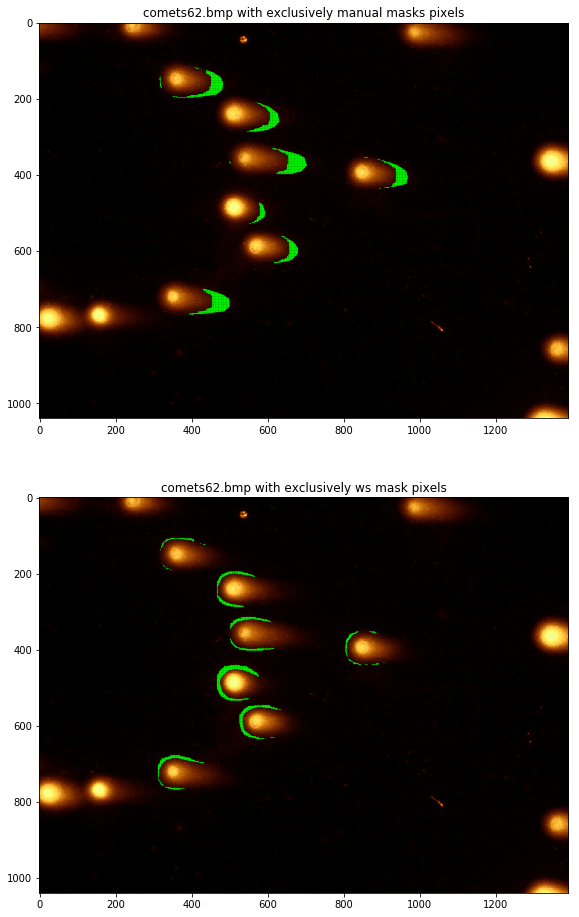

length of onlyManX is:  7
Manual mask intensities:  [4645518, 4574877, 3654664, 4707490, 4919600, 4076080, 4498889]
Watershed mask intensities:  [4178897, 4031467, 4082654, 4520291, 4463173, 4087178, 4158683]
Only manual mask intensities:  [741376, 617282, 165971, 462771, 745918, 333109, 452564]
Only watershed mask intensities:  [274755, 73872, 593961, 275572, 289491, 344207, 112358]

only manual pixels intensity as a proportion of all manual intesnity:  [0.16, 0.13, 0.05, 0.1, 0.15, 0.08, 0.1]

only ws pixels intensity as a proportion of all ws intesnity:  [0.07, 0.02, 0.15, 0.06, 0.06, 0.08, 0.03]

only manual pixels as a proportion of all manual mask pixels:  [0.21, 0.19, 0.08, 0.15, 0.2, 0.12, 0.14]

only ws pixels as a proportion of all ws mask pixels:  [0.09, 0.02, 0.22, 0.09, 0.09, 0.12, 0.04]


In [36]:
manPixX = []
manPixY = []
wsPixX = []
wsPixY = []
onlyManX = []
onlyManY = []
onlyWsX = []
onlyWsY = []
#
fig = plt.figure(figsize = (20,16))
plt.subplot(2, 1, 1)
plt.title(fileName + " with exclusively manual masks pixels")
plt.imshow(imgRaw)
iTailMissing = np.zeros(nMasks)
#
#"""
for n in range(nMasks):
    y, x = np.where(newMmasks[:, :, n] == 1)
    #manPixY = np.append(manPixY, y)
    #manPixX = np.append(manPixX, x)
    manPixY.append(y)
    manPixX.append(x)
    wsY, wsX = np.where(wMasks[:, :, n] == 1)
    #wsPixY = np.append(wsPixY, wsY)
    #wsPixX = np.append(wsPixX, wsX)
    wsPixY.append(wsY)
    wsPixX.append(wsX)
    extraY, extraX = np.where(np.logical_and(newMmasks[:, :, n], np.logical_not(wMasks[:, :, n])))
    #print("length of extraY and extraX is: ", len(extraY), len(extraX))
    #print("dtype of extraY and extraX is: ", extraY.dtype, extraX.dtype)
    #onlyManY = np.concatenate([onlyManY, extraY])
    #onlyManX = np.concatenate([onlyManX, extraX])
    onlyManY.append(extraY)
    onlyManX.append(extraX)
    plt.scatter(onlyManX[n], onlyManY[n], c='lime', s=0.01)
    #iTailMissing[n] = np.sum(imgRaw[onlyManY[n], onlyManX[n]])

plt.subplot(2, 1, 2)
plt.title(fileName + " with exclusively ws mask pixels")
plt.imshow(imgRaw)
iTailMissing = np.zeros(nMasks)
#
#"""
for n in range(nMasks):
    """
    y, x = np.where(newMmasks[:, :, n] == 1)
    #manPixY = np.append(manPixY, y)
    #manPixX = np.append(manPixX, x)
    manPixY.append(y)
    manPixX.append(x)
    wsY, wsX = np.where(wMasks[:, :, n] == 1)
    #wsPixY = np.append(wsPixY, wsY)
    #wsPixX = np.append(wsPixX, wsX)
    wsPixY.append(wsY)
    wsPixX.append(wsX)
    """
    extraY, extraX = np.where(np.logical_and(np.logical_not(newMmasks[:, :, n]), wMasks[:, :, n]))
    #print("length of extraY and extraX is: ", len(extraY), len(extraX))
    #print("dtype of extraY and extraX is: ", extraY.dtype, extraX.dtype)
    #onlyManY = np.concatenate([onlyManY, extraY])
    #onlyManX = np.concatenate([onlyManX, extraX])
    onlyWsY.append(extraY)
    onlyWsX.append(extraX)
    plt.scatter(onlyWsX[n], onlyWsY[n], c='lime', s=0.01)
    #iTailMissing[n] = np.sum(imgRaw[onlyManY[n], onlyManX[n]])
plt.show()
print("length of onlyManX is: ", len(onlyManX))
iMan = []
iWS = []
iOnlyMan = []
iOnlyWS = []
iPropMan = []
iPropWS = []
for n in range(nMasks):
    manInt = np.sum(imgRaw[manPixY[n], manPixX[n]])
    iMan.append(manInt)
    wsInt = np.sum(imgRaw[wsPixY[n], wsPixX[n]])
    iWS.append(wsInt)
    missIntMan = np.sum(imgRaw[onlyManY[n], onlyManX[n]])
    missIntWS = np.sum(imgRaw[onlyWsY[n], onlyWsX[n]])
    iOnlyMan.append(missIntMan)
    iOnlyWS.append(missIntWS)
    propMan = round(iOnlyMan[n] / iMan[n] , 2)
    propWS = round(iOnlyWS[n] / iWS[n] , 2)
    iPropMan.append(propMan) 
    iPropWS.append(propWS)

print("Manual mask intensities: ", iMan)
print("Watershed mask intensities: ", iWS)
print("Only manual mask intensities: ", iOnlyMan)
print("Only watershed mask intensities: ", iOnlyWS)
print("\nonly manual pixels intensity as a proportion of all manual intesnity: ", iPropMan)
print("\nonly ws pixels intensity as a proportion of all ws intesnity: ", iPropWS)
  
## find number of pixels that WS method is cutting out to get idea of tail length reduction
nMan = []
nWS = []
nMissing = []
nOnlyMan = []
nOnlyWS = []
nPropMan = []
nPropWS = []
for n in range(nMasks):
    manPix = np.sum(manPixY[n])
    nMan.append(manPix)
    wsPix = np.sum(wsPixY[n])
    nWS.append(wsPix)
    onlyMan = np.sum(onlyManY[n])
    nOnlyMan.append(onlyMan)
    onlyWS = np.sum(onlyWsY[n])
    nOnlyWS.append(onlyWS)
    propMan = round(nOnlyMan[n]/nMan[n], 2)
    nPropMan.append(propMan)
    propWS = round(nOnlyWS[n]/nWS[n], 2)
    nPropWS.append(propWS)
    
print("\nonly manual pixels as a proportion of all manual mask pixels: ", nPropMan)
print("\nonly ws pixels as a proportion of all ws mask pixels: ", nPropWS)